# 28회차 기출문제 

## 문제 1

**Data description**

-   sex : 성별

-   age : 나이

-   pstatus : 부모와의 동거 유무(T : 동거 o, A : 동거 x)

-   medu : 엄마의 교육수준

    -   0 : none

    -   1 : 초등교육(초등학교)

    -   2 : 5 \~ 9th edu

    -   3 : 중등교육(중학교, 고등학교)

    -   4 : 고등교육(대학, 대학원수준)

-   fedu : 아빠의 교육수준

    -   0 : none

    -   1 : 초등교육(초등학교)

    -   2 : 5 \~ 9th edu(5\~9학년)

    -   3 : 중등교육(중학교, 고등학교)

    -   4 : 고등교육(대학, 대학원수준)

-   guardian : 주보호자

    -   어머니

    -   아버지

    -   기타

-   traveltime : 등하교기간

    -   1 : 15분 이하

    -   2 : 15분 \~ 30분 이하

    -   3 : 30분 \~ 1시간 이하

    -   4 : 1시간 이상

-   studytime : 학습시간

    -   1 : 2시간 이하

    -   2 : 2\~5시간 이하

    -   3 : 5\~10시간 이하

    -   4 : 10시간 이상

-   failure : 학사경고 횟수

-   freetime : 자유시간(1 : 매우 낮음 \~ 5 : 매우 높음)

-   famrel : 가족관계(1 : 매우나쁨 \~ 5 : 매우우수)

-   absences : 결석 유무

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
import koreanize_matplotlib

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/qiwerr1004/ADP_go/main/28/problem1.csv')
df.head()

,sex,age,pstatus,medu,fedu,guardian,traveltime,studytime,failures,freetime,famrel,absences
0,F,18,A,4,4,mother,2,2,0,3,4,No
1,F,17,T,1,1,father,1,2,0,3,5,No
2,F,15,T,1,1,mother,1,2,3,3,4,No
3,F,15,T,4,2,mother,1,3,0,2,3,No
4,F,16,T,3,3,father,1,2,0,3,4,No


1.  **EDA를 실시하시오(5점).**

In [4]:
print("<데이터 기본정보>")
print(df.info())

<데이터 기본정보>
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         395 non-null    object
 1   age         395 non-null    int64 
 2   pstatus     395 non-null    object
 3   medu        395 non-null    int64 
 4   fedu        395 non-null    int64 
 5   guardian    395 non-null    object
 6   traveltime  395 non-null    int64 
 7   studytime   395 non-null    int64 
 8   failures    395 non-null    object
 9   freetime    395 non-null    int64 
 10  famrel      395 non-null    int64 
 11  absences    395 non-null    object
dtypes: int64(7), object(5)
memory usage: 37.2+ KB
None


데이터셋은 총 395개의 레코드와 12개의 컬럼(변수)로 이루어져있다.

이 중 11개의 변수가 설명변수, absences(결석일수)는 종속변수이다.

<데이터 성격에 따른 분류: 일치하지 않으면 타입 변환 필요>

- 수치형 변수: age(나이), failures(학사경고 횟수)
- 범주형(순서, Ordinal):  medu(엄마 교육수준), fedu(아빠 교육수준), traveltime(통학시간), studytime(공부), freetime(쉬는시간), famrel(가족관계), absences(결석유무)
- 명목형 변수: sex(성별), pstatus(동거유무), guardian(주보호자)
  

In [5]:
# 결측 데이터는 없다.
df.isnull().sum()

sex           0
age           0
pstatus       0
medu          0
fedu          0
guardian      0
traveltime    0
studytime     0
failures      0
freetime      0
famrel        0
absences      0
dtype: int64

In [6]:
#변수 타입 변환 전 값을 확인한다.
df.failures.value_counts(normalize=True)*100

0    72.405063
1    12.658228
2     4.303797
3     4.050633
T     3.544304
A     3.037975
Name: failures, dtype: float64

In [7]:
len(df[df.failures.isin(['T', 'A'])])

26

데이터 성격에 따른 변수타입 변환에 앞서 결측치와 데이터 값을 확인한다.

failures는 학사경고 횟수로 수치형 데이터이나 "T", "A" 같은 의미를 알 수 없는 데이터가 존재한다.

T, A가 전체 데이터에서 차지하는 비율은 약 6.5%로 작은 비율을 차지하므로 적절한 대체값으로 대체하기보다는 제거를 선택한다.

In [8]:
# failures T, A 인 행 삭제
df = df[~df['failures'].isin(['T', 'A'])]
df['failures'].value_counts()

0    286
1     50
2     17
3     16
Name: failures, dtype: int64

In [13]:
# 데이터 성격에 따라 변수형태 변환을 실시
df = df.astype({col:'category' for col in ['medu', 'fedu', 'traveltime', 'studytime', 'freetime', 'famrel', 'absences']})
df = df.astype({'failures':'int64'})

In [14]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   sex         369 non-null    object  
 1   age         369 non-null    int64   
 2   pstatus     369 non-null    object  
 3   medu        369 non-null    category
 4   fedu        369 non-null    category
 5   guardian    369 non-null    object  
 6   traveltime  369 non-null    category
 7   studytime   369 non-null    category
 8   failures    369 non-null    int64   
 9   freetime    369 non-null    category
 10  famrel      369 non-null    category
 11  absences    369 non-null    category
dtypes: category(7), int64(2), object(3)
memory usage: 21.1+ KB
None


In [15]:
# 먼저 수치형 변수와 범주형 변수의 통계량 확인
print("<수치형 변수 통계량>")
display(df.describe(include='number'))

print("\n<명목형 변수 통계량>")
display(df.describe(exclude='number'))

<수치형 변수 통계량>


,age,failures
count,369.000000,369.000000
mean,16.699187,0.357724
std,1.287070,0.763965
min,15.000000,0.000000
25%,16.000000,0.000000
50%,17.000000,0.000000
75%,18.000000,0.000000
max,22.000000,3.000000



<명목형 변수 통계량>


,sex,pstatus,medu,fedu,guardian,traveltime,studytime,freetime,famrel,absences
count,369,369,369,369,369,369,369,369,369,369
unique,2,2,5,5,3,4,4,5,5,2
top,F,T,4,2,mother,1,2,3,4,0
freq,194,331,120,107,258,241,183,148,180,261


<수치형 변수 분포>


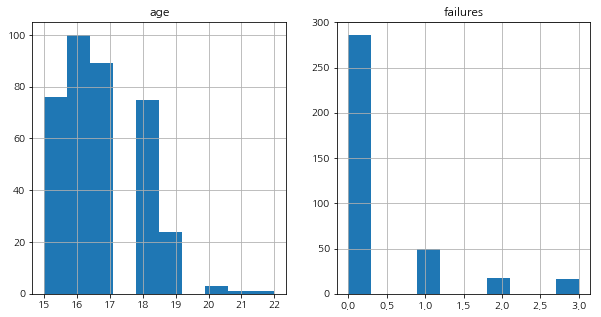

<범주형 변수 분포>


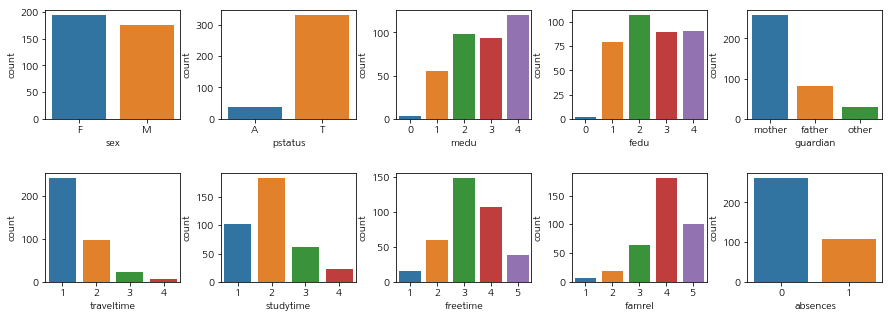

In [16]:
# 수치형 히스토그램
print("<수치형 변수 분포>")

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
n_cols = df.select_dtypes('number').columns

for i, col in enumerate(n_cols):
    df[col].hist(ax=ax[i])
    ax[i].set_title(col)
plt.show()

print("<범주형 변수 분포>")
# 범주형 빈도별 count plot
fig, ax = plt.subplots(2, 5, figsize=(15, 5))
w_cols = df.select_dtypes(['object', 'category']).columns

for i, col in enumerate(w_cols):
    x = i // 5
    y = i % 5
    sns.countplot(df[col], ax=ax[x, y])
plt.subplots_adjust(wspace=0.3, hspace=0.5)
plt.show()


***통계량 분석***
- 수치형: age는 15~17세, 그리고 18세인 학생이 많으며, 학사경고는 받지 안은 학생의 빈도수가 가장 높다.
- 범주형:
    - 남성과 여성의 비율은 큰 차이는 없으나, 여성이 더 많다.
    - 부모와 동거하는 비율이 높으며, 어머니가 주 보호자인 경우가 높다.
    - 어머니의 교육수준은 고등교육이 가장 높으며(4), 아버지의 교육수준은 5~9학년(2)이 가장 많다.
    - 등하교 시간은 가장 짧은 15분 이하(1)가 가장 많으며, 학습시간은 2~5시간 이하(2)가 가장 많았다.
    - 자유시간은 수준"3"이 가장 많으며, 가족관계는 대체로 우수한 (4) 경우가 많았다.
    - 결석여부는 결석하지 않은 학생이 많았다.

In [17]:
# 상관관계 분석 전 문자형으로 되어있는 카테고리형 데이터를 모두 categoriy로 바꿔준다. 
df2 = df.copy()
df2 = df2.replace({'F':0, 'M':1})
df2 = df2.replace({'A':0, 'T':1})
df2 = df2.astype({col:'category' for col in ['sex', 'pstatus']})
df2 = df2.astype({col :'int64' for col in df2.select_dtypes(['category']).columns})

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 369 entries, 0 to 394
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   sex         369 non-null    int64 
 1   age         369 non-null    int64 
 2   pstatus     369 non-null    int64 
 3   medu        369 non-null    int64 
 4   fedu        369 non-null    int64 
 5   guardian    369 non-null    object
 6   traveltime  369 non-null    int64 
 7   studytime   369 non-null    int64 
 8   failures    369 non-null    int64 
 9   freetime    369 non-null    int64 
 10  famrel      369 non-null    int64 
 11  absences    369 non-null    int64 
dtypes: int64(11), object(1)
memory usage: 47.5+ KB


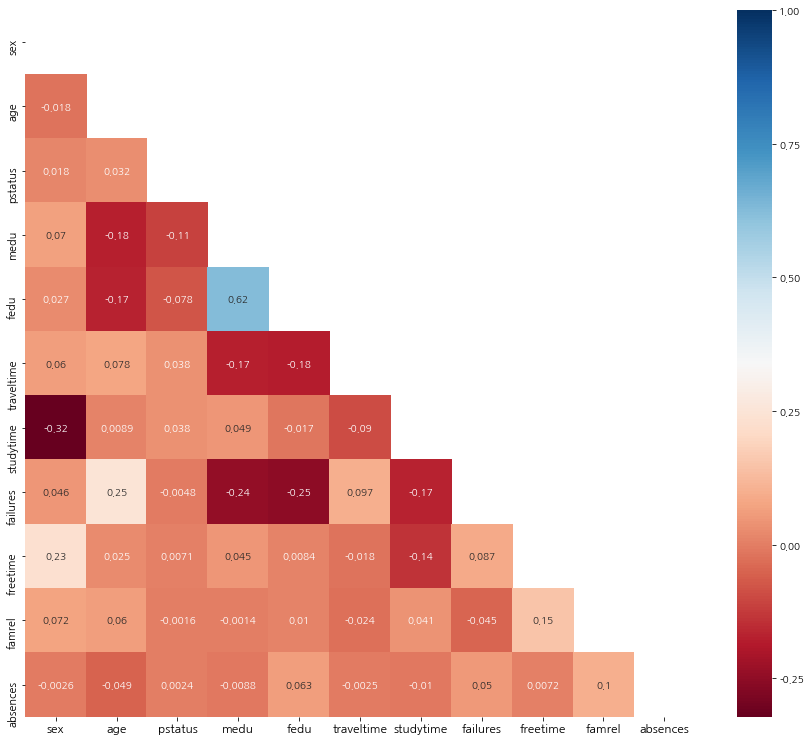

In [19]:
# 다음으로 각 변수간 상관관계를 알아본다. (종속변수에 가장 많은 영향을 끼치는 변수도 확인)
# pearson corration
plt.figure(figsize=(15, 13))
corr = df2.corr()
mask = np.triu(np.ones_like(corr, dtype='bool'))
sns.heatmap(corr, mask = mask, annot=True, cmap='RdBu')
plt.xticks(fontsize=12)  # X축 글자 크기
plt.yticks(fontsize=11)  # Y축 글자 크기
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.show()

***각 변수들 간 상관관계를 확인하기 위해 순서형 변수, 이진 명목변수를 수치형으로 변환하였다.***
- 성별과 학습시간 간에는 약한 음의 상관관계가 있다. 즉, 여성이 학습시간이 더 많은 경향이 있다.
- 어머니의 교육수준과 아버지의 교육수준 간에는 양의 상관관계가 존대한다.
- 다른 변수들 간에는 대체로 유의미한 상관관계가 보이지 않는다.

## 1-2. 데이터 품질을 살펴보고, 차원축소가 필요한지 검토하시오(5점)

차원축소는 차원이 높으며, 변수간의 중복되는 정보가 많을 때 과적합 방지, 연산속도 향상의 목적을 위해 고려하는 방식이다.

대표적인 방식은 주성분분석(PCA), LDA 등이 있다.

해당 데이터의 경우 유의미한 상관관계를 찾기 어려우며(선형적), 차원 축소 시 정보의 손실을 발생시킬 것으로 예상되기 때문에

차원축소를 고려하지 않는다.

## 1-3. 위에서 적용한 것이 과적합이라는 전제하, 해결하기 위한 방법을 2개 제시 및 구현(5점)

실제 변수 간 유의미한 상관관계는 없지만 과적합, 즉 변수 간 높은 양/음의 상관관계가 대부분 존재한다면 이를 해결하기 위한 방식으로 

1. 정규화를 통한 일반화
   * 데이터가 과적합이라는 것은 모델이 학습 데이터에 지나치게 민감하게 반응하여, 테스트 데이터나 다른 데이터 적용 시 일반화된
     결과를 반환하지 못함을 뜻하므로, 정규화를 적용하여 데이터를 일반화함으로써 과적합을 줄일 수 있다. 보통 L1(lasso), L2(ledge) 사용
2. 주성분분석(PCA)을 통한 차원축소
    * 데이터를 대표하는 새로운 축(주성분)을 생성하고, 변수 데이터를 사영하여 적절한 설명률을 가진 변수 선택
3. 앙상블 모델을 사용
    * 편향/분산을 보완하여 일반화 성능 보장


중 2, 3을 고려한다. PCA 와 bagging 을 사용하는 앙상블 모델인 randomforerest 모델을 사용한다.

- 순위가 없는 범주형 변수에 대해 one-hot encoding, 그리고 PCA는 거리기반 방식이므로 수치형 데이터 변수간 범위 일치를 위한 스케일링을 실시한다.

In [45]:
df2 = df.copy()
df2 = df2.replace({"No": 0, "Yes": 1})

# 스케일링, 순서가 없는 범주형 변수 one-hot encoding 실시
c_cols = ['sex', 'pstatus', 'guardian']

#순서가 있는 범주형 변수는 숫자형으로 변환
df2 = df2.astype({col:'int64' for col in df2.select_dtypes(['category']).columns})


# one-hot 전 데이터 분할
from sklearn.model_selection import train_test_split

Y = df2['absences']
X = df2.drop(columns='absences', axis=1)

#층화 샘플링
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, random_state=42, test_size=0.2, stratify = Y)


# one-hot 인코딩
train_X = pd.get_dummies(train_X, columns= c_cols, drop_first=True)
test_X = pd.get_dummies(test_X, columns=c_cols, drop_first=True)
test_X = test_X.reindex(columns=train_X.columns, fill_value=0)

print(f"데이터셋 크기: {train_X.shape} {test_X.shape}")

# 수치형 데이터 스케일링: standard scaler(age, failures)
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

train_X[['age', 'failures']] = sc.fit_transform(train_X[['age', 'failures']])
test_X[['age', 'failures']] =sc.transform(test_X[['age', 'failures']])

데이터셋 크기: (295, 12) (74, 12)


In [46]:
print("<train set 분포>")
display(train_X[['age', 'failures']].describe().T)

print("<test set 분포>")
display(test_X[['age', 'failures']].describe().T)

<train set 분포>


,count,mean,std,min,25%,50%,75%,max
age,295.0,1.987111e-16,1.001699,-1.338071,-0.554875,0.228322,1.011518,4.144303
failures,295.0,2.408619e-17,1.001699,-0.478807,-0.478807,-0.478807,-0.478807,3.304626


<test set 분포>


,count,mean,std,min,25%,50%,75%,max
age,74.0,-0.036272,1.039327,-1.338071,-0.554875,-0.554875,1.011518,2.577910
failures,74.0,-0.137958,0.789306,-0.478807,-0.478807,-0.478807,-0.478807,3.304626


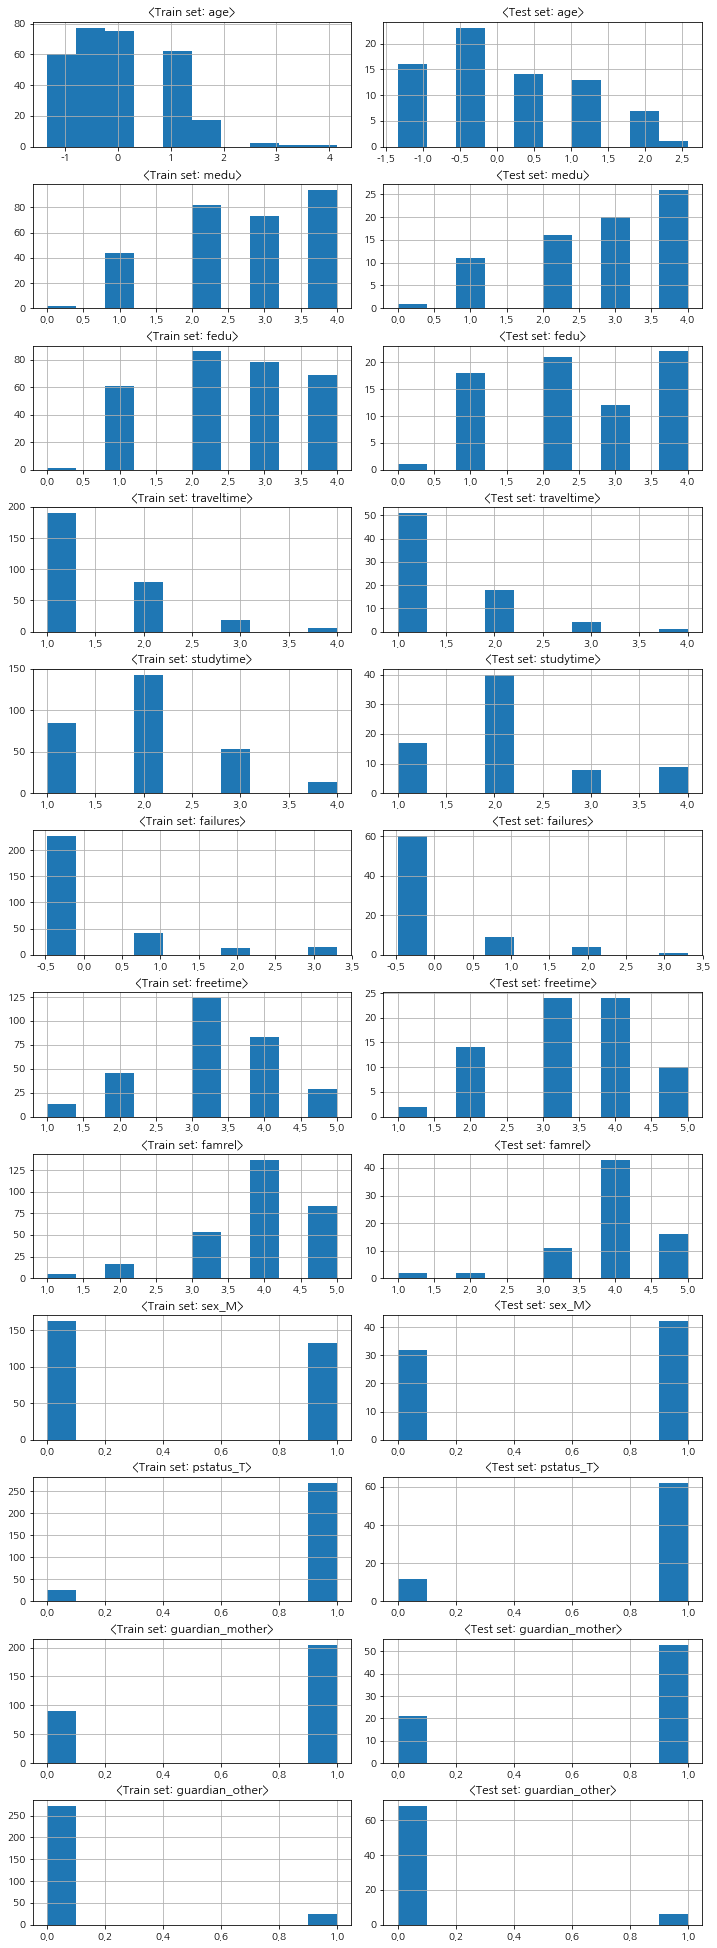

In [47]:
# 두 분할 데이터셋의 분포가 같은지 시각화
fig, ax = plt.subplots(12, 2, figsize=(12, 35))

for i, col in enumerate(train_X.columns):
    train_X[col].hist(ax=ax[i, 0])
    test_X[col].hist(ax=ax[i, 1])
    ax[i, 0].set_title(f"<Train set: {col}>")
    ax[i, 1].set_title(f"<Test set: {col}>")
plt.subplots_adjust(wspace=0.1, hspace=0.3)
plt.show()

In [39]:
# 주성분분석(PCA)

from sklearn.decomposition import PCA
pca = PCA(random_state=42)

p_fit = pca.fit(train_X)

p_result = pd.DataFrame({"변수명": train_X.columns, 
                        "singular value": p_fit.singular_values_, 
                        "설명률": p_fit.explained_variance_ratio_, 
                        "누적설명률": np.cumsum(p_fit.explained_variance_ratio_)})

display(p_result)

,변수명,singular value,설명률,누적설명률
0,age,23.715111,0.274938,0.274938
1,medu,17.740960,0.153865,0.428803
2,fedu,15.548765,0.118189,0.546992
3,traveltime,15.416074,0.116180,0.663172
4,studytime,13.058361,0.083361,0.746533
5,failures,12.500075,0.076385,0.822918
6,freetime,10.967992,0.058808,0.881727
7,famrel,10.721008,0.056190,0.937916
8,sex_M,7.396597,0.026745,0.964662
9,pstatus_T,6.498473,0.020645,0.985306


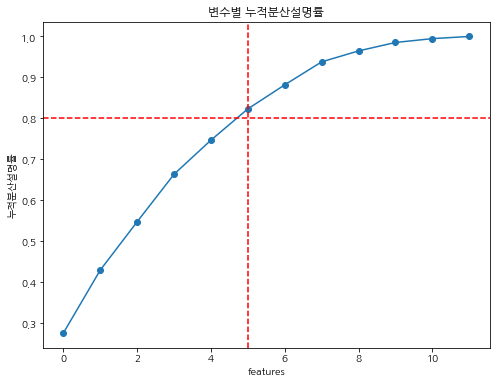

In [41]:
# 누적 scree plot 을 그려본다.
plt.figure(figsize=(8, 6))
plt.plot(p_result['누적설명률'], marker='o')
plt.title("변수별 누적분산설명률")
plt.xlabel("features")
plt.ylabel("누적분산설명률")
plt.axvline(x=5, color='r', linestyle = '--')
plt.axhline(y=0.8, color='r', linestyle = '--')
plt.show()

- PCA 실시 결과, 5개 feature 수준에서 누적분산설명률 0.8 이상이다.
  여기서는 5개 featuer를 선택하여 다시 pca를 설정한다.
- 따라서 pca를 통해 전체 데이터의 약 82%를 설명하는 데이터로 재가공하였다.

- 데이터 비율이 1:2.3 정도로 오버샘플링을 실시할 정도로 불균형하다고 판단되지 않는다.

In [48]:
pca = PCA(n_components=5, random_state=42)

train_X1 = pd.DataFrame(pca.fit_transform(train_X), columns=train_X.columns[:5])
test_X1 = pd.DataFrame(pca.transform(test_X), columns=test_X.columns[:5])

test_X1.head()

,age,medu,fedu,traveltime,studytime
0,-0.117753,-2.291189,1.803366,0.647296,-1.344283
1,-2.115414,-1.262270,0.335312,1.059931,1.340942
2,1.643574,-0.724748,-0.004579,-1.416596,0.183336
3,-0.871168,1.102038,0.007536,-1.169427,-0.901302
4,-0.487636,-0.003223,0.187152,-1.451508,-0.259915


다음으로 앙상블 모델인 random forerest를 구현한다.

이후 test set을 이용하여 성능지표를 확인한다. 주 성능지표를 auc score 로 보조 성능지표로 f1 score를 활용한다.
- 불균형이 아니라고 생각했는데 recall(재현율)이 아주 좋지 않다. f2 socre를 성능지표로 이용해 보고, 개선되지 않는다면, 
   oversampling을 고려한다.

In [52]:
# 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.metrics import confusion_matrix, f1_score, roc_auc_score, make_scorer, fbeta_score


#f2 score
# f2 = make_scorer(fbeta_score, beta=2, average='weighted')
kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestClassifier(random_state=42)
params = {
    'n_estimators': [50, 100], 
    'max_depth': [3, 5], 
    'min_samples_split': [2, 5]
}

grid_f = GridSearchCV(
    estimator = rf, 
    param_grid = params, 
    scoring = 'f1', 
    cv = kf
)

grid_f.fit(train_X, train_Y)

print(f"Best param: {grid_f.best_params_}")
print(f"Best socre: {grid_f.best_score_:.2f}")

pred_train = grid_f.predict(train_X)
pred_test = grid_f.predict(test_X)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y, pred_train):.2f} / {roc_auc_score(train_Y, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

Best param: {'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}
Best socre: 0.00
< 학습 데이터 학습결과 >
f1 score / AUC score: 0.02 / 0.51


,예측 출석,예측 결석
실제 출석,209,0
실제 결석,85,1


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.00 / 0.50


,예측 출석,예측 결석
실제 출석,52,0
실제 결석,22,0


**오버샘플링**

반응변수에 클래스 불균형이 존재할 경우 다수 범주에 과적합되어 소수 범주에 대한 예측 성능이 떨어지는 문제가 발생할 수 있다. 이를 해결하기 위해 오버샘플링 혹은 언더샘플링을 고려해볼 수 있다. 반응변수(absences)의 경우 빈도 불균형이 존재하므로, 오버샘플링을 고려한다.

In [54]:
from imblearn.over_sampling import BorderlineSMOTE
from collections import Counter

smt = BorderlineSMOTE(random_state=42, k_neighbors=3, sampling_strategy='minority')
train_X_o, train_Y_o = smt.fit_resample(train_X1, train_Y)
print(Counter(train_Y_o))

Counter({0: 209, 1: 209})


In [57]:
# 오버샘플링 데이터로 다시 모델 성능측정
grid_f.fit(train_X_o, train_Y_o)

print(f"Best param: {grid_f.best_params_}")
print(f"Best socre: {grid_f.best_score_:.2f}")


pred_train = grid_f.predict(train_X_o)
pred_test = grid_f.predict(test_X1)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y_o, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y_o, pred_train):.2f} / {roc_auc_score(train_Y_o, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

Best param: {'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best socre: 0.71
< 학습 데이터 학습결과 >
f1 score / AUC score: 0.91 / 0.91


,예측 출석,예측 결석
실제 출석,188,21
실제 결석,16,193


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.33 / 0.52


,예측 출석,예측 결석
실제 출석,38,14
실제 결석,15,7


## 4.  **Random forest, neural network, Lightgbm 알고리즘 적용하여 F1 score를 구하고 성능을 비교하시오(5점).**
- 데이터가 불균형하다고 생각하지 않아 oversampling을 실시하지 않았다. (실제로는 오버샘플링이 성능 더 나음)
- 위에서 랜덤 포레스트를 시행하였기 때문에 기본적인 인공신경망(shllow net)과 LGB를 구현하고 F1 score로 성능을 비교한다.
  * 다중 레이블의 f1 score를 평균한 f1_macro 는 채택하지 않는다. 해당 문제에서는 출석할 학생을 예측하는 것보다, 
    결석할 학생을 예측하여 그에 대한 대비를 하는 것이 적절하기 때문이다. 따라서 이상치 탐지와 같이 recall, true label의
    f1 score가 더욱 중요하다고 판단된다.

In [77]:
from sklearn.neural_network import MLPClassifier
from lightgbm import LGBMClassifier


model1= RandomForestClassifier(random_state=42)
model2 = MLPClassifier(random_state=42)
model3 = LGBMClassifier(random_state=42)

param1 = {'n_estimators': [50, 100], 'max_depth': [3, 5, None], 'min_samples_split': [5, 10], 'max_features': ['sqrt', 0.5]}
param2 =  {'learning_rate_init': np.arange(0.01, 0.2, 0.02)}
param3 = {'learning_rate': np.arange(0.01, 0.3, 0.02)}

model1_search = GridSearchCV(
    estimator=model1, 
    param_grid=param1, 
    scoring='f1', 
    cv = kf
)

model2_search = GridSearchCV(
    estimator=model2, 
    param_grid=param2, 
    scoring='f1', 
    cv = kf
)

model3_search = GridSearchCV(
    estimator=model3, 
    param_grid=param3, 
    scoring='f1', 
    cv = kf
)


In [78]:
#랜덤 포레스트 
model1_search.fit(train_X, train_Y)

print(f"Best param: {model1_search.best_params_}")
print(f"Best socre: {model1_search.best_score_:.2f}")


pred_train = model1_search.predict(train_X)
pred_test = model1_search.predict(test_X)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y, pred_train):.2f} / {roc_auc_score(train_Y, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

Best param: {'max_depth': None, 'max_features': 0.5, 'min_samples_split': 5, 'n_estimators': 50}
Best socre: 0.08
< 학습 데이터 학습결과 >
f1 score / AUC score: 0.90 / 0.91


,예측 출석,예측 결석
실제 출석,209,0
실제 결석,15,71


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.19 / 0.51


,예측 출석,예측 결석
실제 출석,46,6
실제 결석,19,3


In [79]:
# 뉴럴넷 (3layer)
model2_search.fit(train_X, train_Y)

print(f"Best param: {model2_search.best_params_}")
print(f"Best socre: {model2_search.best_score_:.2f}")


pred_train = model2_search.predict(train_X)
pred_test = model2_search.predict(test_X)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y, pred_train):.2f} / {roc_auc_score(train_Y, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

Best param: {'learning_rate_init': 0.01}
Best socre: 0.26
< 학습 데이터 학습결과 >
f1 score / AUC score: 0.88 / 0.91


,예측 출석,예측 결석
실제 출석,200,9
실제 결석,11,75


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.39 / 0.58


,예측 출석,예측 결석
실제 출석,41,11
실제 결석,14,8


In [80]:
# LGBM
model3_search.fit(train_X, train_Y)

print(f"Best param: {model3_search.best_params_}")
print(f"Best socre: {model3_search.best_score_:.2f}")


pred_train = model3_search.predict(train_X)
pred_test = model3_search.predict(test_X)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y, pred_train):.2f} / {roc_auc_score(train_Y, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

Best param: {'learning_rate': 0.24999999999999997}
Best socre: 0.26
< 학습 데이터 학습결과 >
f1 score / AUC score: 0.93 / 0.94


,예측 출석,예측 결석
실제 출석,207,2
실제 결석,9,77


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.20 / 0.46


,예측 출석,예측 결석
실제 출석,38,14
실제 결석,18,4


***3개 모델 평가결과: 성능지표 f1 score***

- 학습데이터 모델평가 결과, random forerest를 제외한 두 모델(MLP Classifier, LGBM)의 일반화 성능이 0.26으로 동일하게 높았다.
- Grid search로 선정한 best model 선정 후 
  - train set f1 score는 0.88~0.93 사이로 대체로 label을 잘 예측해냈으며,
  - test set 의 성능은 MLP 모델이 f1 score 0.39로 가장 좋았다.
  
***따라서 MLP 모델을 채택한다.***
- train set 성능 대비 test set 성능이 확연히 떨어지므로 train set에 과적합되었다고 할 수 있다.

시간관계상 파라미터 튜닝을 할 수 없었다. 이번 모델은 MLP의 성능이 가장 뛰어났지만, 파라미터 조정 시 다른 모델의 성능이 더 좋을 수 있다.

## 5.  하드 보팅 기법을 적용하고, 이전 결과와 비교하시오(5점)

하드보팅 기법은 앙상블 학습의 대표적 기법 중 하나이며, 여러분류모델의 최종 예측결과를 다수결 투표로 결정하는 방식이다.

In [82]:
from sklearn.ensemble import VotingClassifier

m1_best_param = model1_search.best_params_
m2_best_param = model2_search.best_params_
m3_best_param = model3_search.best_params_


rf= RandomForestClassifier(**m1_best_param, random_state=42)
mlp = MLPClassifier(**m2_best_param, random_state=42)
lstm = LGBMClassifier(**m3_best_param, random_state=42)

h_voting = VotingClassifier(
    estimators = [
        ('rf', rf), 
        ('mlp', mlp), 
        ('lstm', lstm)
    ], voting='hard'
)

h_voting.fit(train_X, train_Y)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(max_features=0.5,
                                                     min_samples_split=5,
                                                     n_estimators=50,
                                                     random_state=42)),
                             ('mlp',
                              MLPClassifier(learning_rate_init=0.01,
                                            random_state=42)),
                             ('lstm',
                              LGBMClassifier(learning_rate=0.24999999999999997,
                                             random_state=42))])

In [85]:
# Voting
h_voting.fit(train_X, train_Y)

pred_train = h_voting.predict(train_X)
pred_test = h_voting.predict(test_X)

print("< 학습 데이터 학습결과 >")
con1 = pd.DataFrame(confusion_matrix(train_Y, pred_train, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(train_Y, pred_train):.2f} / {roc_auc_score(train_Y, pred_train):.2f}")
display(con1)

print("< 테스트 데이터 학습결과 >")
con2 = pd.DataFrame(confusion_matrix(test_Y, pred_test, labels=[0, 1]), index=['실제 출석', '실제 결석'], columns=['예측 출석', '예측 결석'])
print(f"f1 score / AUC score: {f1_score(test_Y, pred_test):.2f} / {roc_auc_score(test_Y, pred_test):.2f}")
display(con2)

< 학습 데이터 학습결과 >
f1 score / AUC score: 0.95 / 0.95


,예측 출석,예측 결석
실제 출석,208,1
실제 결석,8,78


< 테스트 데이터 학습결과 >
f1 score / AUC score: 0.25 / 0.53


,예측 출석,예측 결석
실제 출석,46,6
실제 결석,18,4


3개 모델의 성능 일반화가 되었다고 보인다.

train set의 경우 f1 score 가 0.95로 향상되었고, test set은 f1 score 0.25로 MLP 보다는 낮지만 이외 2개 모델의 성능보다는 높다.

## 6.  추가적인 처리 방안이 있으면 제시하시오(5점)

해당 데이터셋은 데이터 수가 적으며, label이 1:2.3 가량으로 불균형함을 보이고 있다. 만일 데이터의 수가 충분하고 모델이 클래스 불균형에 잘 대응하는 경우, oversampling은 생략될 수 있다.

하지만 이 데이터는 모델의 성능에 데이터가 민감하게 반응하여 과적합을 보이고 있다. (train set 성능이 높지만 test set 결과는 그에 비해 저조함)

이 문제에서는 이를 위한 방법으로 오버샘플링과 앙상블 모델을 적용하였다.

***tran set의 f1 score는 0.88~0.95 사이로 높은 성능을 보이지만, test set의 f1 score는 0.2~4 사이로 저조한 성능이다.***

***label 1의 예측을 잘 해내지 못하고 있다.***

모델을 단순화하기 위한 방안이 필요하며

- 추가적인 데이터의 확보 및 학습
- 불필요한 변수를 제거함으로써 모델의 복잡성을 낮춤
  * Voting 모델이 개별 모델 기반이므로 permutation importance가 해석 가능한 경우 Permutation importance 방식을 통해 변수 중요도를 산출할 수 있다.
- 모델의 정규화 혹은 복잡도 제한 (예: max_depth 제한, L1/L2 적용)
- 언더샘플링(데이터 양이 충분하다면) 또는 클래스 가중치 조정
- 데이터 증강, 이상치 제거 등의 정제 방안

이를 통해 과적합을 해결할 수 있을 것이다.

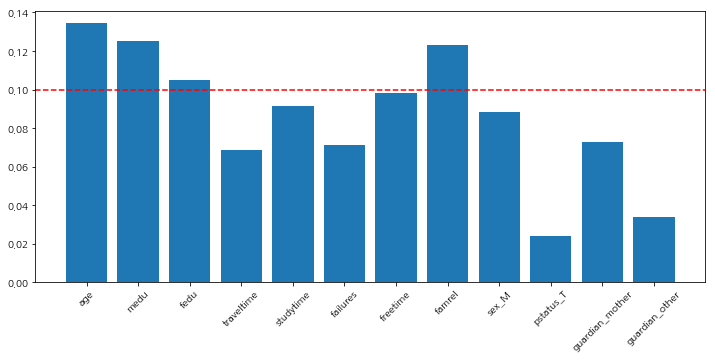

In [91]:
from sklearn.inspection import permutation_importance
f_imp = permutation_importance(h_voting, train_X, train_Y, n_repeats=10, random_state=0)


f = train_X.columns
imp = f_imp.importances_mean
plt.figure(figsize=(12, 5))
plt.bar(f, imp)
plt.xticks(rotation=45)
plt.axhline(y=0.1, color='r', linestyle='--')
plt.show()

변수 중요도의 최소 임계치를 0.1로 두고(임의) age, medu, fedu, famel을 변수로 선택한다.

## 7.  학교 운영시스템에 적용한다면 검토사항은 무엇이 있을지 제시하시오(5점)

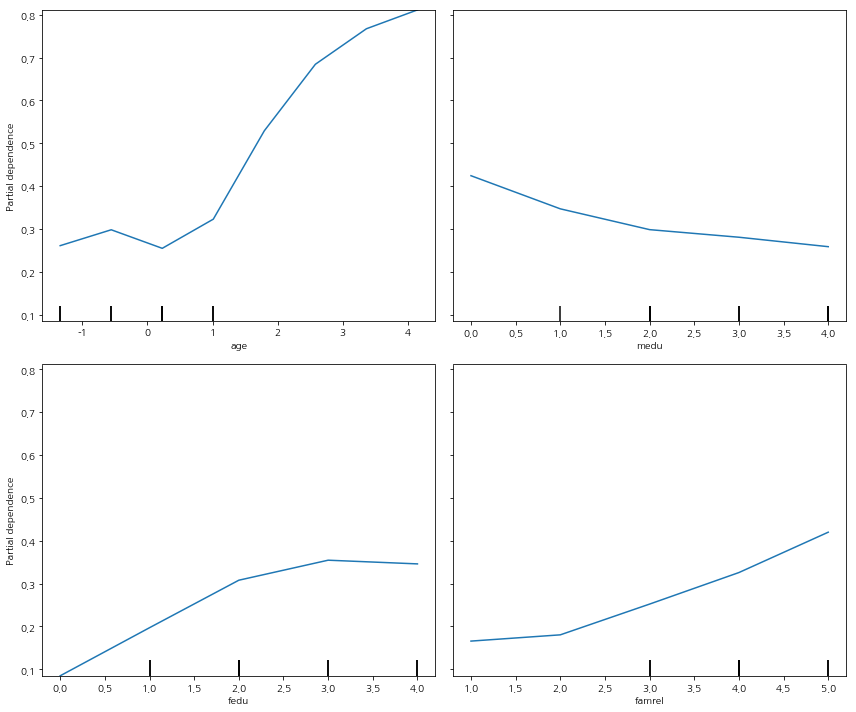

In [105]:
from sklearn.inspection import partial_dependence
from sklearn.inspection import plot_partial_dependence

s_col = ['age', 'medu', 'fedu', 'famrel']

fig, ax = plt.subplots(2, 2, figsize=(12, 10))
plt.subplots_adjust(top=0.9, hspace=0.7)

plot_partial_dependence(estimator=model2_search, 
                       X=train_X, 
                       features=s_col, 
                       percentiles=(0, 1), 
                       ax = ax)
plt.tight_layout()
plt.show()

- 나이가 많은수록 결석할 확률이 높은 경향
  - 고학년 대상으로 출결관리 집중, 대책을 수립한다.
- 엄마의 교육수준이 높을수록 결석률이 낮아지는 경향, 아버지의 교육수준이 높을수록 결석률이 높아지는 경향
  - 엄마의 관리가 학생 결석률을 줄여주는 것으로 판단하며 고학력 엄마일수록 아이의 관리에 신경쓴다.
  -  아버지는 자녀 관리에 큰 관심을 기울이지 않는 것으로 보이나 데이터 수집과정을 확인할 필요가 있다.
- 가족관계가 좋을수록 결석할 확률이 높아지는 경향
  - 데이터 수집과정을 확인할 필요가 있음

## 문제 2

**Data description**

-   **customer_id :** 고객의 고유 ID

-   **age : 나이**

-   **income** : 고객의 월 수입

-   **email_open_rate** : 고객이 이메일을 연 비율

-   **campaign_type : 마케팅 캠페인 타입**

    -   'Sale', 'Discount', 'NewArrival'

-   **clicks : 고객이 마케팅 캠페인에서 클릭한 횟수(target)**

In [241]:
df2 = pd.read_csv('https://raw.githubusercontent.com/qiwerr1004/ADP_go/main/28/problem2.csv')

## 1.  데이터 전처리를 수행하시오.

In [242]:
#데이터의 기본정보 확인
display(df2.info())
#데이터 결측치 확인
print(df2.isna().sum())
# 데이터 프레임 확인
display(df2.head(3))

df2 = df2[df2.columns[1:]]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       200 non-null    int64  
 1   customer_id      200 non-null    int64  
 2   age              200 non-null    int64  
 3   income           200 non-null    int64  
 4   clicks           200 non-null    int64  
 5   email_open_rate  200 non-null    float64
 6   campaign_type    200 non-null    object 
dtypes: float64(1), int64(5), object(1)
memory usage: 11.1+ KB


None

Unnamed: 0         0
customer_id        0
age                0
income             0
clicks             0
email_open_rate    0
campaign_type      0
dtype: int64


,Unnamed: 0,customer_id,age,income,clicks,email_open_rate,campaign_type
0,1,1,46,6707,5,0.49,Discount
1,2,2,57,6018,5,0.78,Sale
2,3,3,56,3518,4,0.80,NewArrival


- 데이터는 총 200개, 7개의 컬럼(변수)로 이루어져 있으나, 이 중 첫번째 컬럼은 불필요하기 때문에 삭제한다.
- 데이터는 총 5개의 독립변수와 1개의 종속변수(campaign_type)로 이루어져 있다.
- 독립변수 4개는 수치형 변수이며(ID는 명목형 변환 필요), 종속변수는 명목형 변수로 해당문제는 다중 분류 문제로 볼 수 있다.
- 결측값은 존재하지 않는다.

NewArrival    72
Discount      66
Sale          62
Name: campaign_type, dtype: int64

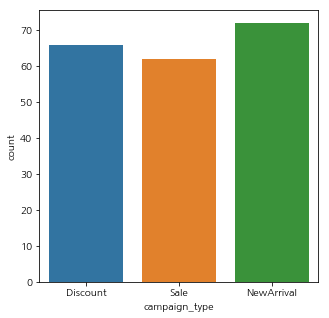

In [243]:
# 레이블 비율 확인
display(df2.campaign_type.value_counts())

# 시각화: bar plot
plt.figure(figsize=(5, 5))

sns.countplot(df2.campaign_type)

plt.show()

종속변수는 총 3개로 분류되며(discount, sale campaign_type, newarrival) 대체로 균등하게 분포되어 있다.

,count,mean,std,min,25%,50%,75%,max
age,200.0,49.820,5.246449,37.0,46.00,49.00,53.00,62.0
income,200.0,6139.970,2260.529173,2015.0,4489.00,6220.50,8057.25,9968.0
clicks,200.0,5.025,2.375413,0.0,3.00,5.00,6.00,14.0
email_open_rate,200.0,0.470,0.300888,0.0,0.19,0.45,0.73,1.0


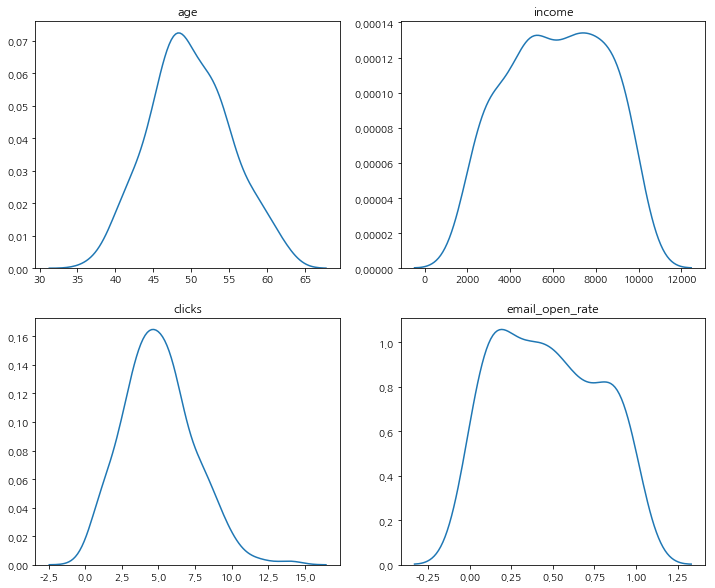

In [244]:
#데이터 통계량 확인
display(df2[df2.columns[1:-1]].describe().T)
#변수별 분포 확인
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(df2.columns[1:-1]):
    x = i // 2
    y = i % 2
    sns.kdeplot(data=df2[col], ax=ax[x, y], legend=None)
    ax[x, y].set_title(col)
plt.show()

In [245]:
# 이상치 확인: Tukey’s Rule
q1 = df2[df2.columns[1:-1]].describe().T['25%']
q3 = df2[df2.columns[1:-1]].describe().T['75%']

iqr = q3 - q1

up = q3 + (1.5*iqr)
down = q1 - (1.5*iqr)

print(f"< 상한기준 >: \n{up}, \n\n < 하한기준 >\n{down}")

< 상한기준 >: 
age                   63.500
income             13409.625
clicks                10.500
email_open_rate        1.540
dtype: float64, 

 < 하한기준 >
age                 35.500
income            -863.375
clicks              -1.500
email_open_rate     -0.620
dtype: float64


age 변수의 이상치 개수: 0
income 변수의 이상치 개수: 0
clicks 변수의 이상치 개수: 3
email_open_rate 변수의 이상치 개수: 0


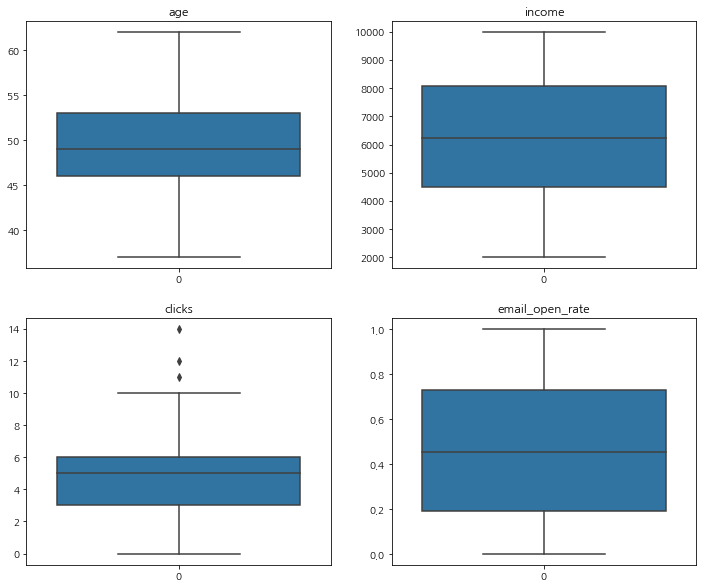

In [246]:
# 이상치에 해당하는 데이터 개수 확인
for col in up.index:
    cnt = len(df2[(df2[col] >= up[col]) | (df2[col] <= down[col])])
    print(f"{col} 변수의 이상치 개수: {cnt}")

# box plot으로 확인한다.
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(df2.columns[1:-1]):
    x = i // 2
    y = i % 2
    sns.boxplot(data=df2[col], ax=ax[x, y])
    ax[x, y].set_title(col)
plt.show()

clicks 변수에서 상한기준을 초과하는 이상치 3개를 식별하였다. 
데이터를 살펴보고 제거 또는 보간을 판단한다.

In [247]:
df2[(df2['clicks'] > up['clicks']) | (df2['clicks'] < down['clicks'])]

,customer_id,age,income,clicks,email_open_rate,campaign_type
89,90,59,2755,12,0.96,Discount
95,96,50,7898,14,0.80,NewArrival
195,196,48,4213,11,0.39,NewArrival


클릭 수 이상치를 상한 값으로 보간한다. 클릭을 많이 했다는 의미이기 때문이다.(x) clip 시 포아송 회귀 유의 x 

클릭 수 이상치 삭제(x)

***기본 원칙: 종속변수는 가능한 한 그대로 두는 게 원칙***
- 종속변수(예: y, count, rate)는 현실을 반영하는 관측값이므로, 이상치를 처리하게 되면  
  일반화 성능이 떨어지게 되며, 통계검정 결과가 근본적으로 바뀌게 됨

In [248]:
# df2['clicks'] = df2['clicks'].clip(upper=up['clicks'])
# df2 = df2.drop(index=[89, 95, 195], axis=0)

age 변수의 이상치 개수: 0
income 변수의 이상치 개수: 0
clicks 변수의 이상치 개수: 3
email_open_rate 변수의 이상치 개수: 0


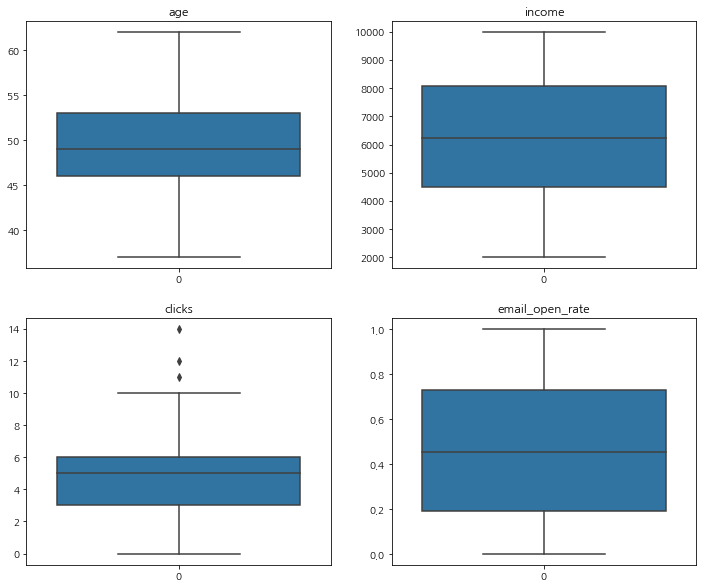

In [249]:
# 이상치에 해당하는 데이터 개수 확인
for col in up.index:
    cnt = len(df2[(df2[col] > up[col]) | (df2[col] < down[col])])
    print(f"{col} 변수의 이상치 개수: {cnt}")

# box plot으로 확인한다.
fig, ax = plt.subplots(2, 2, figsize=(12, 10))

for i, col in enumerate(df2.columns[1:-1]):
    x = i // 2
    y = i % 2
    sns.boxplot(data=df2[col], ax=ax[x, y])
    ax[x, y].set_title(col)
plt.show()

In [250]:
#불필요한 변수인 고객 아이디를 삭제한다.
df2 = df2.drop(columns=['customer_id'])

## 2.  캠페인 타입이 'Sale'인지 여부에 따라 새로운 파생변수를 생성하시오.

In [251]:
# sale: 1, others: 0 (이진분류 문제로 만듬)
df2['is_sale'] = np.where(df2['campaign_type'] == 'Sale', 1, 0)

display(df2.head(5))

,age,income,clicks,email_open_rate,campaign_type,is_sale
0,46,6707,5,0.49,Discount,0
1,57,6018,5,0.78,Sale,1
2,56,3518,4,0.80,NewArrival,0
3,52,2015,4,0.68,NewArrival,0
4,41,9021,1,0.58,Sale,1


## 3.  포아송 회귀 모델을 적합하고, 모델의 통계적 유의성을 검토하시오.

In [252]:
# 포아송 회귀 분석을 실시하기 전에 모델의 과대 분산 여부를 먼저 확인한다. 과대 분산 시 포아송 분포를 실시하지 못함
rs = (df2['clicks'].var(ddof=1)/df2['clicks'].mean()).round()
print(f"분산/평균 비가 {rs} 이므로", "과대분산이 아니다. 포아송 회귀분석 실시" if rs <= 1 else "과대분산이다. 포아송 회귀분석 불가")

분산/평균 비가 1.0 이므로 과대분산이 아니다. 포아송 회귀분석 실시


유의수준 5% 에서 귀무가설과 대립가설을 설정한다.

- 귀무가설(H0): 포아송 모델이 통계적으로 유의하지 않다.(모델이 데이터를 잘 설명하지 못한다.)
- 대립가설(H1) 포아송 모델이 통계적으로 유의하다.(모델이 데이터를 잘 설명한다.)

In [254]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats

model = smf.glm(formula = 'clicks ~ age + income + email_open_rate + C(is_sale)', 
               data = df2, 
               family=sm.families.Poisson()).fit()
# 모델의 잔차이탈도: 모델이 얼마나 데이터를 잘 설명하지 못하는지를 나타내는 지표(작을수록 좋음)
residual_deviance = model.deviance
#자유도
df_resid = model.df_resid
#p_value
p_value = stats.chi2.sf(residual_deviance, df_resid)
print(f"p-value가 {p_value:.3f}로 포아송 모델은 ", "통계적으로 유의하다.(귀무가설 기각)" if p_value <= 0.05 else "통계적으로 유의하지 않다.")

p-value가 0.035로 포아송 모델은  통계적으로 유의하다.(귀무가설 기각)


유의수준 5% 하에서 p-value 0.035로 귀무가설을 기각한다. 따라서 포아송 회귀분석 모델은 통계적 유의성이 있다.

In [201]:
print(model.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:                 clicks   No. Observations:                  200
Model:                            GLM   Df Residuals:                      195
Model Family:                 Poisson   Df Model:                            4
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -446.87
Date:                Wed, 11 Jun 2025   Deviance:                       223.44
Time:                        15:25:44   Pearson chi2:                     210.
No. Iterations:                     4   Pseudo R-squ. (CS):           0.005221
Covariance Type:            nonrobust                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           1.4251      0.329     

## 4.  회귀 계수의 통계적 유의성을 확인하고, 해석하시오.

-   $H0$: 각 변수의 회귀계수는 0이다.

-   $H1$: 각 변수의 회귀계수는 0이 아니다.


유의수준 5% 하에서 모든 설명변수의 p-value가 0.05 이상이므로 귀무가설을 기각할 수 없다.  
따라서 모든 설명변수와 종속변수(clicks) 간 통계적으로 유의미한 관계가 없다.

## 5. Random forest 모델을 적합하고, 포아송 회귀와 모델 성능을 비교(평가지표 : RMSE)

In [266]:
# 데이터 분할: train, test
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

Y = df2['clicks']
X = df2.drop(columns=['clicks', 'campaign_type'], axis=1)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=42, test_size=0.3)

#모델 구축
rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, Y_train)

RandomForestRegressor(random_state=42)

In [267]:
# train set을 이용한 포아송 회귀모델
p_model = smf.glm(formula = 'clicks ~ age + income + email_open_rate + C(is_sale)', 
               data = pd.concat([X_train, Y_train], axis=1), 
               family=sm.families.Poisson()).fit()
# 모델의 잔차이탈도: 모델이 얼마나 데이터를 잘 설명하지 못하는지를 나타내는 지표(작을수록 좋음)
residual_deviance = p_model.deviance
#자유도
df_resid = p_model.df_resid
#p_value
p_value = stats.chi2.sf(residual_deviance, df_resid)

In [268]:
from sklearn.metrics import mean_squared_error
# 포아송 회귀 결과
p_train_pred = p_model.predict(X_train)
p_test_pred = p_model.predict(X_test)

p_rmse_train = mean_squared_error(Y_train, p_train_pred)
p_rmse_test = mean_squared_error(Y_test, p_test_pred)
print(f"포아송 회귀모델의 학습데이터 성능은 RMSE: {p_rmse_train:.3f}")
print(f"포아송 회귀모델의 테스트 데이터 성능은 RMSE: {p_rmse_test:.3f}")

포아송 회귀모델의 학습데이터 성능은 RMSE: 5.278
포아송 회귀모델의 테스트 데이터 성능은 RMSE: 6.523


In [269]:
# 랜덤 포레스트 
rf_train_pred = rf.predict(X_train)
rf_test_pred = rf.predict(X_test)

rf_rmse_train = mean_squared_error(Y_train, rf_train_pred)
rf_rmse_test = mean_squared_error(Y_test, rf_test_pred)
print(f"랜덤 포레스트 회귀모델의 학습데이터 성능은 RMSE: {rf_rmse_train:.3f}")
print(f"랜덤 포레스트 회귀모델의 테스트 데이터 성능은 RMSE: {rf_rmse_test:.3f}")

랜덤 포레스트 회귀모델의 학습데이터 성능은 RMSE: 1.007
랜덤 포레스트 회귀모델의 테스트 데이터 성능은 RMSE: 7.071


In [270]:
print("랜덤 포레스트" if p_rmse_test > rf_rmse_test else "포아송", "회귀분석의 성능이 더 뛰어나다.")

포아송 회귀분석의 성능이 더 뛰어나다.


테스트 셋 기준으로 두 모델의 성능을 rmse 성능지표로 보았을 때 포아송 회귀분석의 성능이 더 뛰어남을 알 수 있다.

## 문제 3

### 1.  시간별, 제조사별 불량률 데이터로 생존분석을 시행한 후 25, 30, 35개월 후의 불량률을 계산하시오(5점)

Kaplan-Meier 생존 함수 또는 Cox 비례위험모형을 사용하여 생존분석 가능

In [273]:
df3 = pd.read_csv('https://raw.githubusercontent.com/qiwerr1004/ADP_go/main/28/problem3.csv')

df3.head()

,time,status,company
0,8,1,X
1,10,1,X
2,8,0,X
3,12,1,X
4,20,1,X



< X >
25개월 후 생존확률: 64.17 % / 불량률: 35.83 %
30개월 후 생존확률: 64.17 % / 불량률: 35.83 %
35개월 후 생존확률: 55.00 % / 불량률: 45.00 %

< Y >
25개월 후 생존확률: 56.25 % / 불량률: 43.75 %
30개월 후 생존확률: 46.88 % / 불량률: 53.12 %
35개월 후 생존확률: 28.13 % / 불량률: 71.87 %


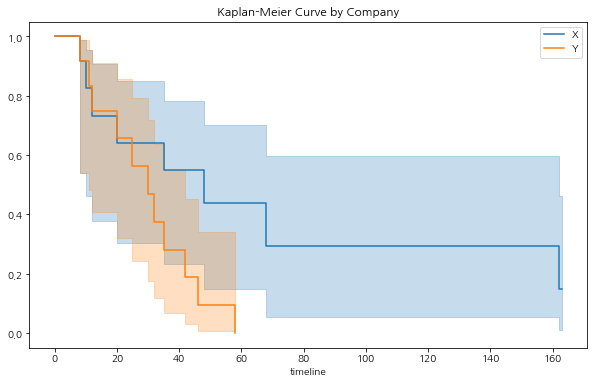

In [295]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()

plt.figure(figsize=(10, 6))

for com in df3['company'].unique():
    sub_com = df3[df3.company == com]
    kmf.fit(durations=sub_com['time'], event_observed=sub_com['status'], label=com)

    print(f"\n< {com} >")
    for t in [25, 30, 35]:
        s = kmf.survival_function_at_times(t).values[0]
        f_rate = 1 - s
        print(f"{t}개월 후 생존확률: {s*100:.2f} % / 불량률: {f_rate*100:.2f} %")
    kmf.plot_survival_function()
plt.title('Kaplan-Meier Curve by Company')
plt.show()

25, 30, 35 시점의 회사별 생존확률과 불량률은 다음과 같다.
< X >
25개월 후 생존확률: 64.17 % / 불량률: 35.83 %
30개월 후 생존확률: 64.17 % / 불량률: 35.83 %
35개월 후 생존확률: 55.00 % / 불량률: 45.00 %
< Y >
25개월 후 생존확률: 56.25 % / 불량률: 43.75 %
30개월 후 생존확률: 46.88 % / 불량률: 53.12 %
35개월 후 생존확률: 28.13 % / 불량률: 71.87 %

- 전체 기간에 걸쳐 X 회사의 생존확률이 높으며, 불량률은 낮다.  
  시간이 경과되면서 X 회사의 생존확률, 불량률은 천천히 감소하나, Y 회사는 급격히 감소/증가한다.

In [307]:
# cox 회귀
from lifelines import CoxPHFitter

# 범주형 변수 처리 (원-핫 인코딩 등)
df_dummies = pd.get_dummies(df3, columns=['company'], drop_first=True)

cph = CoxPHFitter()
cph.fit(df_dummies, duration_col='time', event_col='status')
cph.summary

,coef,exp(coef),se(coef),coef lower 95%,coef upper 95%,exp(coef) lower 95%,exp(coef) upper 95%,cmp to,z,p,-log2(p)
covariate,,,,,,,,,,,
company_Y,0.9549,2.598412,0.523175,-0.070504,1.980305,0.931924,7.244955,0.0,1.825201,0.067971,3.878944


***COX회귀분석***
- X사에 비해 Y사는 고장날 확률이 2.598배 높다.
- p-value가 0.06으로 귀무가설을 기각할 수 없다. 따라서 두 회사 간 고장률은 유의미한 차이는 없다.(전체기간)  

***Cox 비례위험모형 결과, company_Y는 기준군 대비 약 2.60배의 고장 위험을 보였으나(p=0.068) 통계적으로 유의하지 않았다.  
    Kaplan-Meier 생존곡선에서도 company_Y는 다소 빠른 고장 경향을 보였으나 명확한 차이는 확인되지 않았다.***

### 2.  로그 순위법으로 제조사별 불량률의 차이가 있는지 검정하시오(5점)

로그 순위법은 두 생존 곡선이 차이가 있는지 검정하는 비모수적 방법입니다.  
`survdiff` 함수에 구현되어 있으며, 유의 수준 0.05에서 검정을 실시하는 방법입니다.

-   $H_0$: 두 생존 함수는 동일하다. $S_X(t) = S_Y(t)$ for all $t$
-   $H_1$: 두 생존 함수는 같지 않다. $S_X(t) \neq S_Y(t)$ for some $t$

In [310]:
from lifelines.statistics import logrank_test

com_X = df3[df3.company == 'X']
com_Y = df3[df3.company == 'Y']

rt = logrank_test(com_X['time'], com_Y['time'], 
                 event_observed_A=com_X['status'], 
                 event_observed_B=com_Y['status'])

p_value = rt.p_value
print(f"로그순위 테스트 결과, p-value: {p_value:.2f}로 불량률의 차이가", "통계적으로 유의하다.(귀무가설 기각)" if p_value <= 0.05 else 
     "통계적으로 유의하지 않다.(기각x, 차이 없음)")

로그순위 테스트 결과, p-value: 0.06로 불량률의 차이가 통계적으로 유의하지 않다.(기각x, 차이 없음)


## 문제 4

별도의 데이터 없음

**다음 표는 슬통 Food의 신제품 홍보 설문 조사 결과이다. 시식 행사에 참여한 고객들의 시식 후 구매 의사의 변화가 있는지 없는지 검정하시오(10점).**

| 구분         | 시식 후 있음 | 시식 후 없음 |
|--------------|--------------|--------------|
| 시식 전 있음 | 23           | 7            |
| 시식 전 없음 | 18           | 12           |

-   $H_0$ : 시식 전후 구매의사에는 변화가 없다.
-   $H_1$ : 시식 전후 구매의사에는 변화가 있다.

In [ ]:
from statsmodels.stats.contingency_tables import mcnemar

tt = np.array([[23, 18],
               [7, 12]])

result = mcnemar(tt, exact=False, correction=False)
print(f"McNemar test statistic: {result.statistic}")
print(f"p-value: {result.pvalue}")

유의수준 5%에서 p-value=0.02781로 작으므로, 귀무가설을 기각할 수 있다. 따라서 시식 전후 구매 의사에 변화가 있다는 통계적 근거가 충분하다.

## 문제 5

**두 개의 고등학교 학생들의 시험 표준 점수가 들어있습니다. 각 학생의 성적이 서로 독립적이라고 가정할 때, 두 학교의 표준 점수 분포에 유의미한 차이가 있는지 검정하시오(10점).**

In [ ]:
dat = pd.read_csv('problem5.csv')

In [ ]:
dat.isna().sum()

school_A에 결측치가 12개 존재한다. school_A의 결측치를 삭제한다. 

In [ ]:
score_A = dat['school_A'].dropna().values
score_B = dat['school_B'].values

-   $H_0$ : 두 학교의 점수 분포는 같다.
-   $H_1$ : 두 학교의 점수 분포는 다르다.

In [ ]:
from scipy.stats import ks_2samp
statistic, p_value = ks_2samp(score_A, score_B)
print(f"KS Test statistic: {statistic}")
print(f"p-value: {p_value}")

유의수준 5%에서 p-value=0.485 크므로, 귀무가설을 기각할 수 없다. 따라서 두 학교의 점수 분포는 같은 분포에서 나왔다고 할 수 있다.

## 문제 6

슬통 병원 환자들의 건강 검진 정보가 들어있습니다. 다음의 물음에 답하시오.

In [ ]:
dat = pd.read_csv('problem6.csv')

1.  **몸무게를 제어했을 때, 나이와 콜레스테롤 상관계수 및 유의확률을 구하라(5점).**

In [ ]:
import pingouin as pg
result = pg.partial_corr(data=dat, x='AGE_GROUP', y='TOT_CHOLE', covar='WEIGHT')
print(result)

-   $H_0$ : 몸무게를 통제했을 때, 나이와 콜레스테롤의 상관계수는 0이다.

-   $H_1$ : 몸무게를 통제했을 때, 나이와 콜레스테롤의 상관계수는 0이 아니다.

편상관계수는 0.0167, p-value는 0.2826이다.

2.  **유의수준 0.05 하에서 통계적 의사결정을 수행하라(5점).**

유의수준 5%에서 p-value=0.2826로 크므로, 귀무가설을 기각할 수 없다. 따라서 몸무게를 통제했을 때, 나이와 콜레스테롤 간에는 통계적으로 유의미한 관계가 없다.